# pytorch

使用pytorch实现的两层前向传播神经网络

只有隐层需要激活函数，输出层不需要

(500, 128)
(500,)
(100, 128)
(100,)


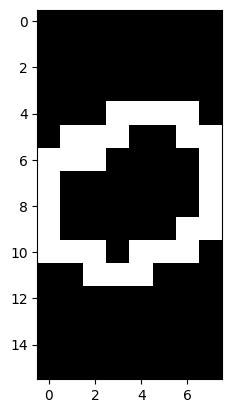

In [2]:
from neural_network import *
import matplotlib.pyplot as plt
import cv2
from torch import nn
import torch.optim as optim
import torch


data_small = load_data_small()
data_medium = load_data_medium()
data_large = load_data_large()
print(data_small[0].shape)
print(data_small[1].shape)
print(data_small[2].shape)
print(data_small[3].shape)
# 每个数据集的组织形式都是data[0]为X_train，data[1]为y_train
data_large[0]
type(type(data_large[0]))
data_large[0].astype(np.uint8)
data_large[0].shape
data_large[0][0].shape
# 将一行转化为16*8的矩阵
data_large[0][0].reshape(8,16).shape
# 用plt输出
plt.imshow(data_large[0][0].reshape(16,8),cmap='gray')

In [3]:
def num2str(num):
    """
    Label 0 corresponds to “a,” 1 to “e,” 2 to “g,” 3 to “i,” 4 to “l,” 5 to 
    “n,” 6 to “o,” 7 to “r,” 8 to “t,” and 9 to “u.”

    Args:
        num (str): 标签含义
    """
    if num == 0:
        return 'a'
    elif num == 1:
        return 'e'
    elif num == 2:
        return 'g'
    elif num == 3:
        return 'i'
    elif num == 4:
        return 'l'
    elif num == 5:
        return 'n'
    elif num == 6:
        return 'o'
    elif num == 7:
        return 'r'
    elif num == 8:
        return 't'
    elif num == 9:
        return 'u'
    
        


label_num = data_small[1]
# 使用map方法提高效率
label_num = list(map(num2str, label_num))


261


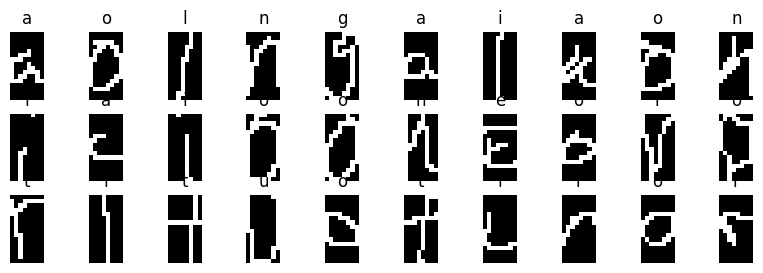

In [4]:
# 各随机抽取10张进行展示
# 随机生成10个下标
index_idx = 0
index = np.random.randint(0, data_small[0].shape[0], 10)
assert len(index) == 10
print(index[0])
fig, ax = plt.subplots(3, 10, figsize=(10, 3))
label_str_small = list(map(num2str, data_small[1]))
label_str_medium = list(map(num2str, data_medium[1]))
label_str_large = list(map(num2str, data_large[1]))
for i in range(10):
    ax[0, i].imshow(data_small[0][index[index_idx]].reshape(16, 8), cmap='gray')
    ax[1, i].imshow(data_medium[0][index[index_idx]].reshape(16, 8), cmap='gray')
    ax[2, i].imshow(data_large[0][index[index_idx]].reshape(16,8), cmap='gray')
    index_idx += 1
    ax[0, i].axis('off')
    ax[0, i].set_title(label_str_small[index[i]])
    ax[1, i].axis('off')
    ax[1, i].set_title(label_str_medium[index[i]])
    ax[2, i].axis('off')
    ax[2, i].set_title(label_str_large[index[i]])
plt.show()

In [16]:
def one_hot(y, num_class):
    return np.eye(num_class)[y]
label_train_small = one_hot(data_small[1], 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
class MLP(nn.Module):
    """实现一个单隐层的前向神经网络模型
    fc->sigmoid->fc->sigmoid
    """
    def __init__(self, in_features, hidden_features, out_features):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features, hidden_features) # 输入层到隐层， fc表示全连接层，输入特征数为in_features，输出特征数为hidden_features
        self.fc2 = nn.Linear(hidden_features, out_features) # 隐层到输出层，输入特征数为hidden_features，输出特征数为out_features
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        """fc->sigmoid->sigmoid
        """
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [9]:
loss = nn.CrossEntropyLoss 

array([6, 9, 3, 7, 8, 1, 4, 4, 5, 3, 6, 4, 3, 7, 9, 7, 0, 7, 9, 9, 7, 5,
       2, 0, 5, 3, 8, 6, 5, 7, 6, 3, 9, 1, 6, 9, 4, 9, 6, 6, 4, 3, 6, 9,
       0, 5, 2, 1, 2, 3, 8, 0, 3, 8, 9, 4, 2, 0, 7, 1, 2, 5, 8, 7, 2, 4,
       5, 2, 1, 7, 5, 5, 0, 2, 9, 9, 0, 8, 9, 4, 4, 7, 7, 3, 8, 8, 7, 1,
       1, 2, 1, 5, 4, 0, 8, 1, 8, 9, 5, 7, 1, 0, 2, 7, 9, 5, 0, 6, 9, 3,
       0, 8, 8, 1, 0, 8, 5, 2, 2, 5, 6, 5, 6, 3, 2, 8, 3, 7, 3, 8, 0, 4,
       9, 8, 6, 9, 0, 3, 3, 5, 3, 2, 4, 7, 2, 9, 4, 9, 0, 2, 8, 1, 2, 9,
       5, 1, 5, 1, 8, 1, 1, 9, 3, 4, 4, 2, 5, 2, 5, 5, 7, 2, 1, 9, 6, 3,
       5, 0, 1, 7, 3, 5, 6, 8, 1, 3, 1, 4, 1, 3, 8, 2, 5, 1, 5, 7, 6, 9,
       8, 8, 9, 3, 1, 2, 7, 8, 4, 5, 1, 6, 2, 5, 6, 9, 6, 9, 8, 8, 9, 8,
       1, 0, 5, 9, 5, 6, 0, 2, 3, 0, 1, 8, 3, 2, 1, 9, 9, 4, 7, 3, 4, 5,
       8, 3, 9, 9, 4, 2, 4, 1, 2, 3, 5, 5, 9, 6, 0, 0, 5, 5, 3, 0, 9, 4,
       1, 7, 4, 6, 4, 8, 3, 2, 0, 5, 1, 0, 3, 6, 0, 2, 8, 7, 7, 8, 0, 3,
       9, 0, 2, 7, 7, 4, 6, 9, 2, 7, 0, 1, 3, 3, 8,

In [33]:
# 使用数据训练三个mlp模型
model_small = MLP(128, 64, 10)
model_medium = MLP(128, 64, 10)
model_large = MLP(128, 64, 10)

# 数据准备
x_train_small = torch.Tensor(data_small[0])
y_train_small = torch.Tensor(data_small[1])
label_train_small = torch.Tensor(one_hot(data_small[1], 10))
x_val_small = torch.Tensor(data_small[2])
y_val_small = torch.Tensor(data_small[3])

x_train_medium = torch.Tensor(data_medium[0])
y_train_medium = torch.Tensor(data_medium[1])
label_train_medium = torch.Tensor(one_hot(data_medium[1], 10))
x_val_medium = torch.Tensor(data_medium[2])
y_val_medium = torch.Tensor(data_medium[3])

x_train_large = torch.Tensor(data_large[0])
y_train_large = torch.Tensor(data_large[1])
label_train_larget = torch.Tensor(one_hot(data_large[1], 10))
x_val_large = torch.Tensor(data_large[2])
y_val_large = torch.Tensor(data_large[3])


# # 模型和数据都放入GPU
# model = model.cuda()
# for i in range(4):
#     data_small[i] = data_small[i].cuda()
#     data_medium[i] = data_medium[i].cuda()
#     data_large[i] = data_large[i].cuda()

# 定义损失和优化器
criterion = nn.CrossEntropyLoss()
optimizer_small = optim.SGD(model_small.parameters(), lr=0.01, momentum=0.9)
optimizer_medium = optim.SGD(model_medium.parameters(), lr=0.01, momentum=0.9)
optimizer_large = optim.SGD(model_large.parameters(), lr=0.01, momentum=0.9)
print(type(optimizer_large))


def train(model:MLP, batch_size: int, epochs: int, optimizer, model_name: str, optimizer_name:str, log_path: str = "logs/"):
    """训练

    Args:
        model (MLP): _description_
        batch_size (int): _description_
        epochs (int): _description_
        optimizer (_type_): _description_
        model_name (str): 模型名称，用于log信息
        optimizer_name (str): 优化器名称
        log_path (str, optional): 日志位置. Defaults to "logs/".
    """
    file_name = f"model-{model_name}_batch_size-{batch_size}_epochs-{epochs}_optimizer-{optimizer_name}.csv"
    file = open(log_path + file_name, "w")
    file.write("epoch, loss, acc\n")
    for epoch in range(epochs):
        running_loss = 0.0
        for i in range(0, len(x_train_small), batch_size):
            # 获取一个 batch 的数据和标签
            inputs = x_train_small[i:i+batch_size]
            labels = label_train_small[i:i+batch_size]

            # 清零梯度，计算损失，反向传播和更新模型参数
            optimizer_small.zero_grad()
            outputs = model_small(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # 统计损失值
            running_loss += loss.item()

        # 在测试集上评估模型性能
        with torch.no_grad():
            outputs = model_small(x_val_small)
            _, predicted = torch.max(outputs, dim=1)
            accuracy = (predicted == y_val_small).sum().item() / len(y_val_small)

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(x_train_small)}, Accuracy: {accuracy}")
        file.write(f"{epoch},{running_loss/len(x_train_small)},{accuracy}\n")
    file.close()
    # # 抽取一部分batch做最小批梯度下降

    # random_index = np.random.randint(0, len(data_small[0]), batch_size) # 随机生成0到len(train_data)的整数，个数为batch_size
    # pred = model(data_small[0][index])
    # pred.backward()
    # loss()




<class 'torch.optim.sgd.SGD'>
Epoch 1, Loss: 0.14782725620269777, Accuracy: 0.1
Epoch 2, Loss: 0.14756586599349975, Accuracy: 0.11
Epoch 3, Loss: 0.14737917995452882, Accuracy: 0.1
Epoch 4, Loss: 0.14721911430358886, Accuracy: 0.1
Epoch 5, Loss: 0.14706902265548705, Accuracy: 0.1
Epoch 6, Loss: 0.14692030715942384, Accuracy: 0.1
Epoch 7, Loss: 0.14676799488067627, Accuracy: 0.1
Epoch 8, Loss: 0.14660877561569213, Accuracy: 0.1
Epoch 9, Loss: 0.14644006681442262, Accuracy: 0.1
Epoch 10, Loss: 0.14625954294204713, Accuracy: 0.11
Epoch 11, Loss: 0.1460649290084839, Accuracy: 0.11
Epoch 12, Loss: 0.14585389280319214, Accuracy: 0.13
Epoch 13, Loss: 0.14562402629852295, Accuracy: 0.15
Epoch 14, Loss: 0.14537283658981323, Accuracy: 0.19
Epoch 15, Loss: 0.14509779119491578, Accuracy: 0.25
Epoch 16, Loss: 0.14479634761810303, Accuracy: 0.29
Epoch 17, Loss: 0.14446603345870973, Accuracy: 0.31
Epoch 18, Loss: 0.1441045551300049, Accuracy: 0.33
Epoch 19, Loss: 0.14370991611480713, Accuracy: 0.32
E

In [ ]:
# 1. small train
train(model_small, 16, 1000, optimizer_small, "small", "sgd")
# 2. medium train
train(model_medium, 16, 1000, optimizer_medium, "medium", "sgd")
# 3. large train
train(model_large, 16, 1000, optimizer_large, "large", "sgd")

## 初始化

w1矩阵可以用高斯进行初始化

b1矩阵可以置0初始化，可以增加拟合速度

## 反向传播

Loss fuction: $L = (\boldsymbol{y}, \boldsymbol{\\hat{y}})$

求偏导 $\frac{\partial L}{\partial w_{i, j}^{(l)}}$

记 $z_i^{l} = {W_i^{l}}^T x$ 是第l层的第i个节点的点积

设 $\frac{\partial L}{\partial z_i^{l}}$ 为 $\delta_i^{l}$，表示L对第l层第i个节点的点积的偏导

由此可以表示 $\frac{\partial L}{\partial w_{i, j}^{(l)}} = \delta_i^{l} a_j^{l-1}$ , $a_j^{l-1}$ 就是上一层节点的激活输出

现在只要能知道 $\delta_i$ 就可以求出偏导

### 如何求 $\delta_i^{l}$

$$
\begin{aligned}
\delta_i^{l} \equiv \frac{\partial L}{\partial z_j^{l}} = L'(a_j^l) \sigma' (z_i^l) \\
\end{aligned}
$$

则损失值可以表示为

$$
L = \frac{1}{2} \sum_j (y_j - a_j)^2 
$$

四个公式

$$
\\begin{aligned}
\end{aligned}
$$